## Описание данных 

Набор данных состоит из оценок, полученных учащимися по различным предметам, и других критериев.

- gender: Этот столбец указывает пол студента. Он может содержать значения: female, malе.
- race/ethnicity: Этот столбец содержит информацию о расовой или этнической группе студента. Возможные значения: group A, group B, group C, group D, group E.
- parental level of education: Этот столбец отображает уровень образования родителей студента. Возможные значения:some high school, high school, some college, associate's degree, bachelor's degree, master's degree.
- lunch: Этот столбец указывает, какой тип питания был предоставлен студенту. Возможные значения: standard, free/reduced.
- test preparation course(целевая переменная)Этот столбец указывает, прошел ли студент курс подготовки к экзаменам. Возможные значения: none, completed.
- math score: Оценка студента по математике на экзамене.
- reading score: Оценка студента по чтению на экзамене. 
- writing score: Оценка студента по письму на экзамене.

## Подготовка данных

In [17]:
import numpy as np
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Проверим пропуски в данных перед анализом зависимостей переменных

In [18]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Пропусков в нашем датасете не имеется, поэтому продолжим работу с датасетом и закодируем категориальные переменные.

Проверим описательные статистики нашего датасета:

In [19]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


По данному датасету мы сразу можем отметить какие типы данных мы имеем. Например, в нашем датасете:

Категориальные переменные - gender, race/ethnicity,	parental level of education, lunch,	test preparation, course

Количественные переменные - math score, reading score, writing score.

А также можем рассмотреть размах максимальных и минимальных значений количественных переменных.

## Первичный анализ зависимостей 

Проведем кодировку категориальных переменных:

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != 'test preparation course']  # Исключаем

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

target = df['test preparation course']
df_encoded = pd.concat([df[numerical_columns], df[categorical_columns]], axis=1)
df_encoded.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,0,1,1,1,72,72,74
1,0,2,4,1,69,90,88
2,0,1,3,1,90,95,93
3,1,0,0,0,47,57,44
4,1,2,4,1,76,78,75


После проведенной кодировки категориальных признаков посмотрим на матрицу корреляций, чтобы определить зависимости переменных

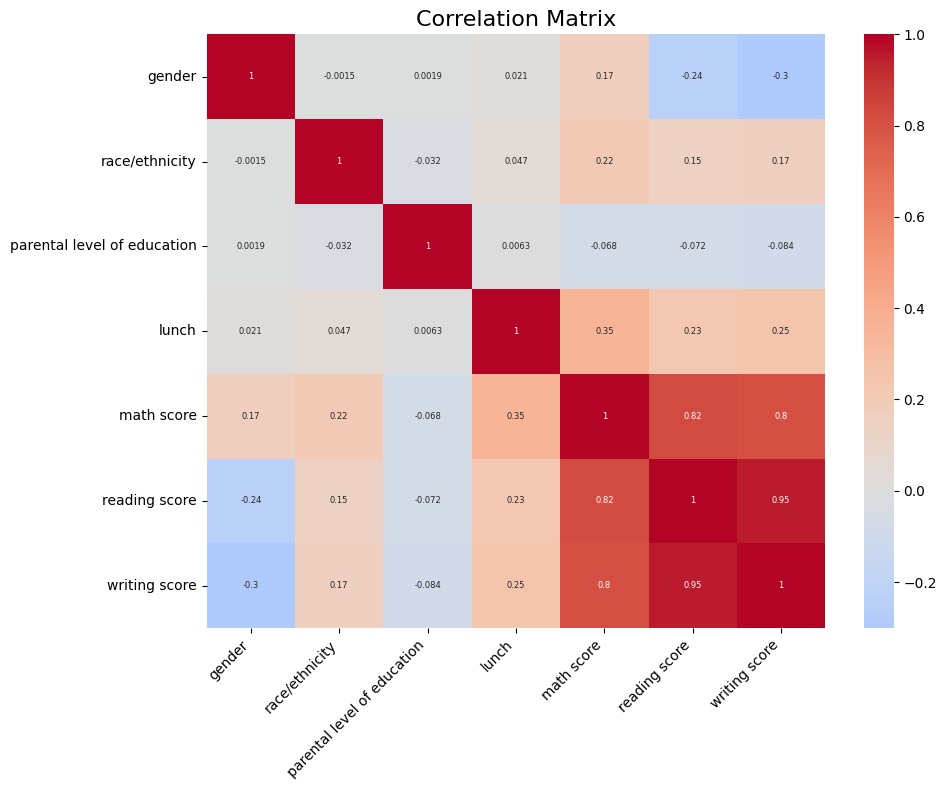

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', center=0,
            annot_kws={"size": 6})  
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Из данной корреляционной матрицы мы можем отметить наиболее коррелирующие друг с другом признаки, а именно:math score, reading score, writing score.

Далее рассмотрим их диаграммы рассеивания:

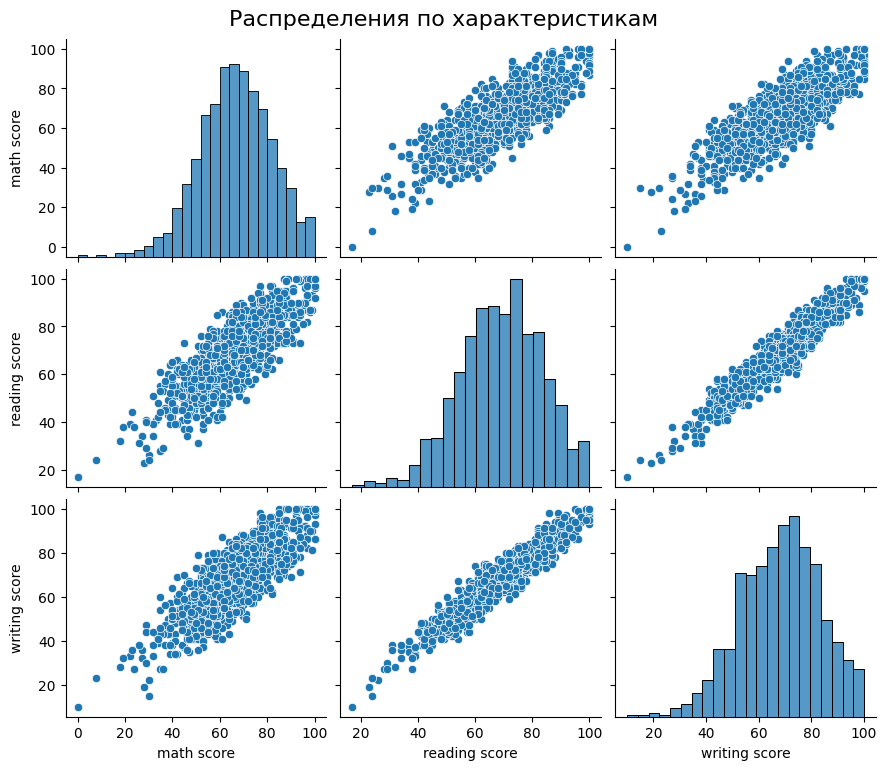

In [30]:
selected_columns = ['math score', 'reading score', 'writing score']
sns.pairplot(df_encoded[selected_columns], height=2.5, aspect=1.2)
plt.suptitle('Распределения по характеристикам', fontsize=16, y=1.02)
plt.show()

По данным диаграммам рассеивания и высоким значениям корреляционной матрицы мы можем сделать вывод о сильной линейной зависимости данных.

In [31]:
df_encoded.describe()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.829522,0.478753,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,1.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,2.000000,2.000000,1.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,100.00000,100.000000,100.000000


Однако, по описанию нашего датасета мы можем отметить достаточно большой размах между значениями количественных и категориальных признаков. Для категориальных признаков значения варьируются в диапазоне от 0 до 5. А для количественных признаков значения имеют размах в диапазоне от 57 до 100. Что сильно отличается от размаха диапазона категориальных переменных. Потому нам необходимо стандартизировать наши количественные признаки и привести их к более близкому диапазону значений категориальных признаков.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

df_encoded.describe()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.263256e-17,9.414691e-17,-1.580958e-16,-1.953993e-17,8.704149e-17,2.167155e-16,-1.350031e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-9.646253e-01,-1.879647e+00,-1.359505e+00,-1.347925e+00,-4.360728e+00,-3.574960e+00,-3.822345e+00
25%,-9.646253e-01,-1.015044e+00,-8.126404e-01,-1.347925e+00,-5.997164e-01,-6.968462e-01,-6.784278e-01
50%,-9.646253e-01,-1.504409e-01,-2.657761e-01,7.418811e-01,-5.872457e-03,5.694554e-02,6.228578e-02
75%,1.036672e+00,7.141621e-01,8.279526e-01,7.418811e-01,7.199368e-01,6.736842e-01,7.206978e-01
max,1.036672e+00,1.578765e+00,1.374817e+00,7.418811e-01,2.237538e+00,2.112741e+00,2.103363e+00


В результате нашей стандартизации значения наших количественных переменных приблизились к диапазону категориальных признаков. Рассмотрим, как теперь выглядят первые 5 строк наших новых данных

In [33]:
df_encoded.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,-0.964625,-1.015044,-0.812640,0.741881,0.390024,0.193999,0.391492
1,-0.964625,-0.150441,0.827953,0.741881,0.192076,1.427476,1.313269
2,-0.964625,-1.015044,0.281088,0.741881,1.577711,1.770109,1.642475
3,1.036672,-1.879647,-1.359505,-1.347925,-1.259543,-0.833899,-1.583744
4,1.036672,-0.150441,0.827953,0.741881,0.653954,0.605158,0.457333


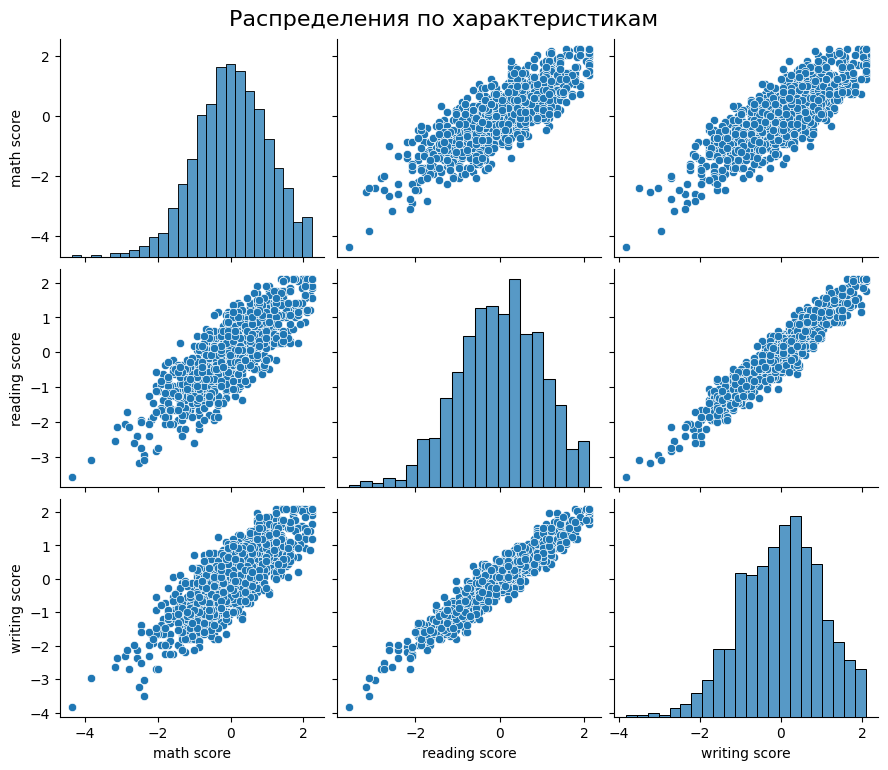

In [34]:
selected_columns = ['math score', 'reading score', 'writing score']
sns.pairplot(df_encoded[selected_columns], height=2.5, aspect=1.2)
plt.suptitle('Распределения по характеристикам', fontsize=16, y=1.02)
plt.show()

Мы закончили с первичным анализом данных и подготовкой данных к работе с алгоритмом PCA. В результате анализа мы нашли наиболее зависимые признаки, стандартизировали данные и закодировали категориальные переменные. 

## Применение PCA и анализ

Теперь нам необходимо применить метод главных компонент и снизить их количество до того уровня, где они объясняют 90% дисперсии.

Начнём с того, что вычислим связь между переменными и факторами для случайного числа факторов. Допустим, мы возьмем три. Мы начинаем с полностью случайного выбора числа факторов, чтобы потом уточнить и прийти к наилучшему варианту.

В качестве аргументов мы указываем наш датафрейм, желаемое число факторов и метод, который мы будем использовать. В данном случае pa соответствует методу главных компонент.

Затем посмотрим на таблицу факторных нагрузок. Она отражает корреляцию между фактором и переменной. Подсветим все значения больше 0.3 и меньше -0.3. Их мы будем считать достаточными.

In [35]:
from statsmodels.multivariate.factor import Factor
import matplotlib.pyplot as plt

factor = Factor(df_encoded, n_factor=3, method='pa')
result = factor.fit()
result.get_loadings_frame(threshold=0.3)

,factor 0,factor 1,factor 2
writing score,0.966959,-0.242770,-0.032076
math score,0.949584,0.461991,-0.005450
reading score,0.939831,-0.168407,-0.070508
race/ethnicity,0.183129,0.055764,-0.036018
gender,-0.148856,0.670066,-0.097288
lunch,0.299195,0.147100,0.339032
parental level of education,-0.076538,0.002039,0.089706


По таблице факторных нагрузок мы можем отметить следующие скрытые переменные:

Рассмотрим factor 0, где объединены переменные рассовой группы студента, а также его оценок по письму, чтению и математике. В целом данные признаки действительно могут объяснять успеваемость студента.

Рассмотрим factor 1, где выделена единственная переменная - пол студента. Данного признака слишком мало для выделения скрытых признаков.

Рассмотрим factor 2, где объединены переменные типа обеда студента, а также его уровня образования студента. В целом данные признаки действительно могут объяснять успеваемость студента, однако выглядят не сильно очевидными)

Попробуем выбрать оптимальное число факторов. Воспользуемся методом локтя

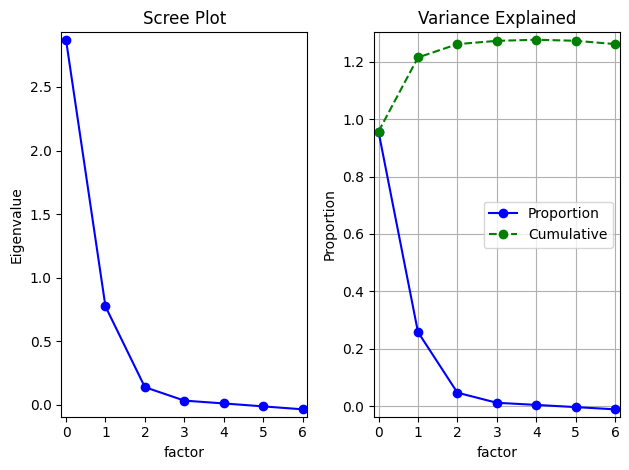

In [36]:
result.plot_scree()
plt.grid()
plt.show()

По данному графику мы можем заметить очевидную точку перегиба в точке, где указано 3 фактора. Значит это число факторов действительно является оптимальным.

Теперь проверим какие переменные могут быть полезны для новых латентных признаков с помощью метода главных факторов.

In [78]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=3, random_state=42)  
factors = fa.fit_transform(df_encoded)

columns = [f'Factor{i+1}' for i in range(3)]
fa_df = pd.DataFrame(data=factors, columns=columns)

loadings = fa.components_.T 
loadings_df = pd.DataFrame(loadings, columns=columns, index=df_encoded.columns)

for i in range(len(columns)):
    print(f"\nПризнаки, влияющие на {columns[i]}:")
    significant_features = loadings_df.iloc[:, i]
    for feature, value in significant_features.items():
        print(f"{feature}: {value:.6f}")  


Признаки, влияющие на Factor1:
gender: 0.108047
race/ethnicity: -0.189376
parental level of education: 0.077979
lunch: -0.298905
math score: -0.925580
reading score: -0.959407
writing score: -0.948961

Признаки, влияющие на Factor2:
gender: 0.889455
race/ethnicity: 0.072987
parental level of education: 0.003425
lunch: 0.145154
math score: 0.326790
reading score: -0.187665
writing score: -0.227579

Признаки, влияющие на Factor3:
gender: 0.255914
race/ethnicity: -0.170874
parental level of education: -0.022654
lunch: -0.283842
math score: -0.089162
reading score: 0.103448
writing score: 0.014122


На данном шаге мы вывели веса влияющие на новые выделенные латентные признаки. Они уже отличаются от предыдущего метода. 

Превый фактор кажется достаточно хорошим для описания успеваемости студента. Действительно, лучше всего можно описать успеваемость студента, если рассмотреть его оценки по основным 3 предметам: math score, reading score, writing score.

Остальные компоненты ссылаются на пол и расовую группу студента.

## Метод наибольшего правдаподобия 

In [80]:
from statsmodels.multivariate.factor import Factor
import matplotlib.pyplot as plt

factor = Factor(df_encoded, n_factor=3, method='ml')
likelihood_result = factor.fit()
likelihood_result.get_loadings_frame(threshold=0.3)

C:\Users\nastya-pls\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\multivariate\factor.py:417: UserWarning: Fitting did not converge
  warnings.warn("Fitting did not converge")


,factor 0,factor 1,factor 2
math score,-0.988510,0.163135,0.004352
reading score,-0.893692,-0.407455,-0.091964
writing score,-0.879992,-0.423506,0.096543
lunch,-0.321229,0.163711,0.198768
race/ethnicity,-0.203403,0.079682,0.151469
gender,-0.067145,0.762505,-0.231269
parental level of education,0.071409,0.015100,-0.078886


In [81]:
likelihood_result.rotate('varimax')
likelihood_result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Factor analysis results
================================================================================================
                                                                                                
------------------------------------------------------------------------------------------------
                             Communality                                                        
------------------------------------------------------------------------------------------------
 gender race/ethnicity parental level of education lunch  math score reading score writing score
------------------------------------------------------------------------------------------------
 0.6241         0.0678                      0.0068 0.1645     0.9941        0.9767        0.9689
------------------------------------------------------------------------------------------------
                                                                                                
------------------------------------------------------------------------------------------------
                          Pre-rotated loadings                                                  
---------------------------------------------------------------------------------------------------------------------
                                                 factor 0                      factor 1                      factor 2
---------------------------------------------------------------------------------------------------------------------
gender                                            -0.0671                        0.7625                       -0.2313
race/ethnicity                                    -0.2034                        0.0797                        0.1515
parental level of education                        0.0714                        0.0151                       -0.0789
lunch                                             -0.3212                        0.1637                        0.1988
math score                                        -0.9885                        0.1631                        0.0044
reading score                                     -0.8937                       -0.4075                       -0.0920
writing score                                     -0.8800                       -0.4235                        0.0965
------------------------------------------------------------------------------------------------
                                                                                                
------------------------------------------------------------------------------------------------
                        varimax rotated loadings                                                
---------------------------------------------------------------------------------------------------------------------
                                                 factor 0                      factor 1                      factor 2
---------------------------------------------------------------------------------------------------------------------
gender                                             0.1168                        0.7908                        0.0197
race/ethnicity                                    -0.1711                        0.0703                        0.1909
parental level of education                        0.0699                        0.0232                       -0.0783
lunch                                             -0.2623                        0.1589                        0.2747
math score                                        -0.9155                        0.3710                        0.1675
reading score                                     -0.9700                       -0.1441                       -0.1072
writing score                                     -0.9536                       -0.2226          

После применения вращения Varimax значения факторов стали более чёткими. Как видно, оценки по предметам до сих пор объясняют первый фактор, а второй хорошо объясняется разницей полов.

## Визуализируем полученный результат 

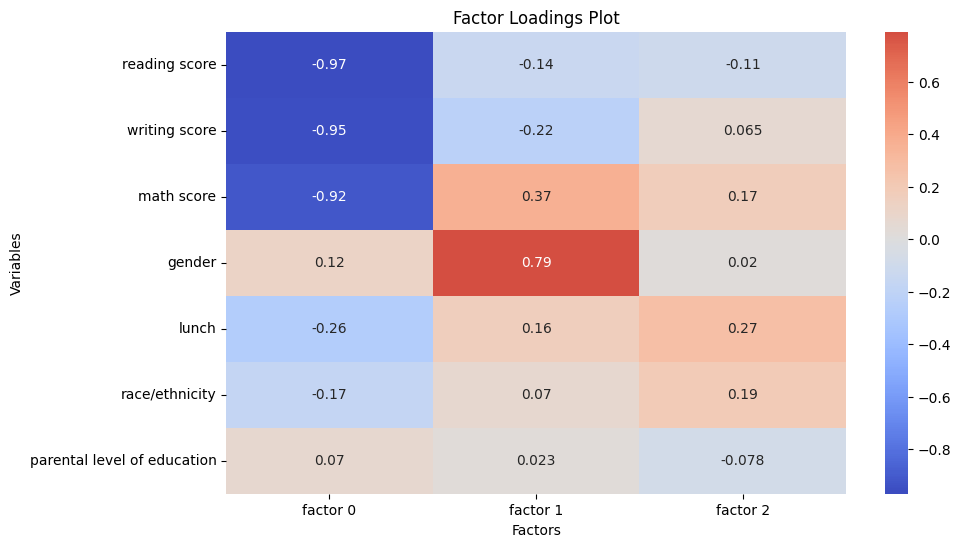

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

loadings = likelihood_result.get_loadings_frame(threshold=0.3)
loadings_data = loadings.data

# 1. График нагрузок факторов
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_data, annot=True, cmap="coolwarm", center=0, cbar=True)
plt.title("Factor Loadings Plot")
plt.xlabel("Factors")
plt.ylabel("Variables")
plt.show()

## Сравнение результатов

Как видно, оба метода показали, что оценки, тип питания и этническая принадлежность практически полностью объясняют успешность прохождения курса, однако в методе наибольшего правдоподобия результаты получились более явно определёнными.